**A walk through olympic history:**

This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. This data was scrapped from www.sports-reference.com in May 2018. 

Note that the Winter and Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a four year cycle starting with 1994, then Summer in 1996, then Winter in 1998, and so on. A common mistake people make when analyzing this data is to assume that the Summer and Winter Games have always been staggered.



Methodology used:
The analysis will follow CRISP-DM approach. CRISP-DM stands for Cross Industry Standard Process for Data Mining. It is a standard robust technique that provides a structured approach to planning a data mining project.

The given below are the processes it follow:

Business Understanding
Data Understanding
Prepare Data
Data Modelling
Evaluation of Result
Deployment of Model
1. Business Understanding:
This data set contain the history of 120 years in olympics .It consist of both winter and summer olypmics

The Data is so diverse that lot of insights can be extracted out of it. But our agenda will be revolving around below mentioned questions:

What is the average/maximum/minimum age of atheletes ?
What was participation of atheletes throught years in both the olympics  ?
which country is the performer in all time in 120 years ?
Can you find the average age of USA athelete which had won a medal ?
The summary of our analysis can be found at this  Analysis result

2. Data Understanding:
Data Understanding means know your data well enough to answer all those query for which analysis is being carried out. The data can be huge and more sometime that may not be necessary for our analysis. The best approach to gather data is that we should collect it in entirity and then we can mine into it according to the needs.

The used for the analysis Olympic data set . It can be found at this link.
https://www.kaggle.com/biphili/india-and-the-world-at-the-olympic-games/#data
It has two .csv files:

athletes_events.csv : This data contain the athelete Partcipated in olympics.
noc_regions.csv:This data contains NOC data which had participated

Importing basic libraries to be used in the analysis :

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import  seaborn  as   sns

In [3]:
df = pd.read_csv('athlete_events.csv')

In [4]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
# Let's investigate more about the dataset

df.shape

(271116, 15)

In [6]:
# Let's remove those records having all columns missing.
df.dropna(how='all',inplace=True)

Let's see total columns name and how many records each column has. It is the best way to see if any missing values are there in each columns.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 33.1+ MB


In [8]:
# check columns with no missing values
set(df.isna().sum()[df.isna().sum()==0].keys())

{'City',
 'Event',
 'Games',
 'ID',
 'NOC',
 'Name',
 'Season',
 'Sex',
 'Sport',
 'Team',
 'Year'}

In [9]:

round((df.isnull().sum()/df.shape[0])*100,2)

ID         0.00
Name       0.00
Sex        0.00
Age        3.49
Height    22.19
Weight    23.19
Team       0.00
NOC        0.00
Games      0.00
Year       0.00
Season     0.00
City       0.00
Sport      0.00
Event      0.00
Medal     85.33
dtype: float64

In [10]:

# Let's find out the columns having more than 50% record missing. If exist, we will remove the column.
df.columns[round((df.isnull().sum()/df.shape[0])*100,2)>50]

Index(['Medal'], dtype='object')

We cannot fill medal value as number of athelete has not won any medals.

# Q1 What is the average/maximum/minimum age/hieght/weight of atheletes ?

**AVG HIEGHT WEIGHT AND AGE OF ATHLETES**

In [11]:
df[['Age','Height','Weight']].describe()

,Age,Height,Weight
count,261642.000000,210945.000000,208241.000000
mean,25.556898,175.338970,70.702393
std,6.393561,10.518462,14.348020
min,10.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,97.000000,226.000000,214.000000


Average age was 25.5,Weight 70.7,Height 175.3

D:\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


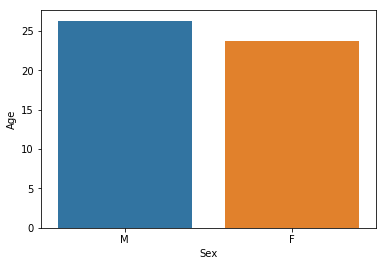

In [12]:
# now lets find out average age of male female participated in olympic
sns.barplot(x='Sex',y='Age',data=df)

So average age men is 25.5 and women was 24 

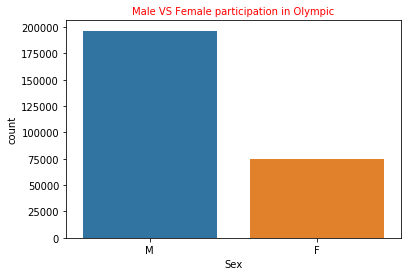

In [13]:
#Lets find the whether more men participated or women
sns.countplot(x='Sex',data=df)
plt.title('Male VS Female participation in Olympic',size=10,color='red')
plt.savefig('participation2.jpg')

So more men participated as compare to the womens

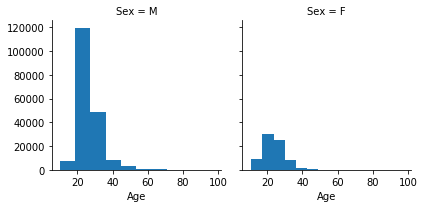

In [14]:
#lets plot the age gorup of men and women
g = sns.FacetGrid(data=df,col='Sex')
g.map(plt.hist,'Age')

So maximum number of men belong to 20-25 age group and women belong to 20-30 age group

**CORELATION BETWEEN HIEGH AND WEIGHT**

D:\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


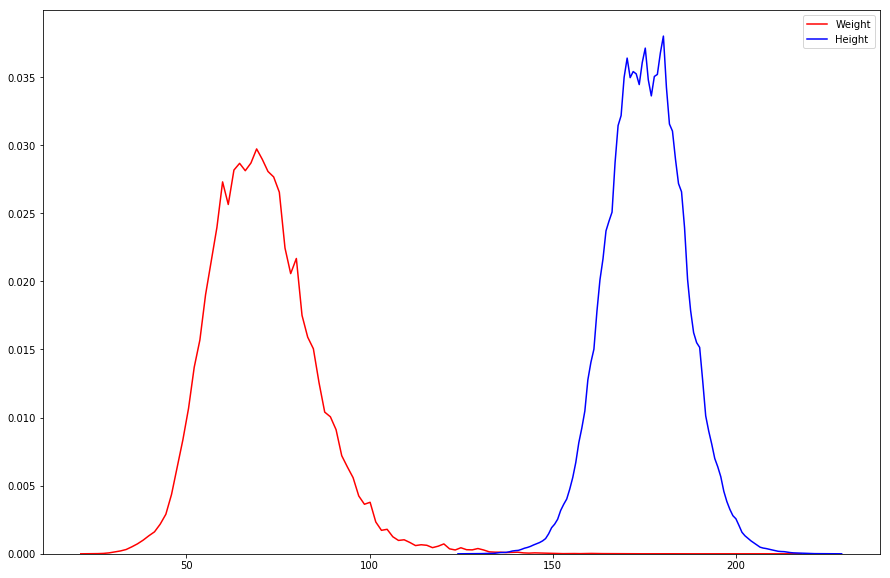

In [15]:
f,ax=plt.subplots(figsize=(15,10))
sns.kdeplot(df['Weight'].dropna(),color='r',label='Weight')
sns.kdeplot(df['Height'].dropna(),color='b',label='Height')

**AGE OF ATHLETES WON MEDALS IN DIFFERENT SEASON**

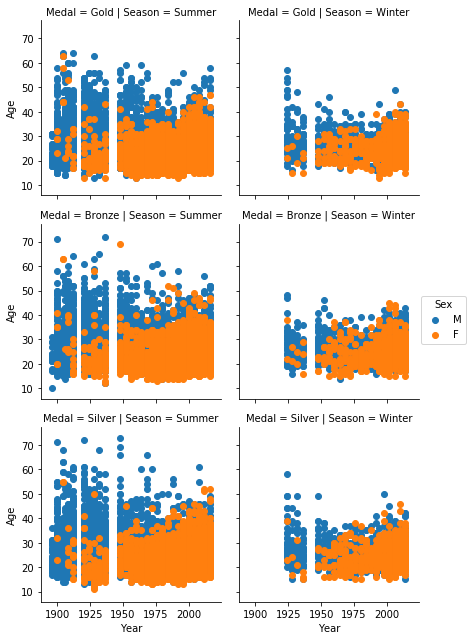

In [16]:
g = sns.FacetGrid(df, col="Season",row ="Medal",hue='Sex')

g = g.map(plt.scatter, "Year", "Age").add_legend()

Maximum number youngster belong to 20-30 age group had won medal

# What was participation of atheletes throught years in both the olympics  ?

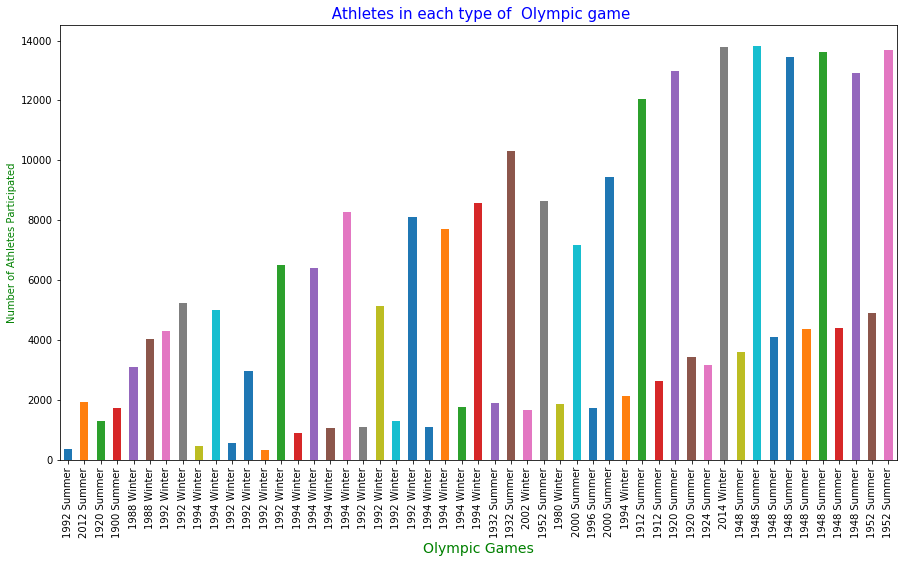

In [17]:
#lets plot the barplot
WOLRD =df.groupby('Games').count()['ID']
fig, ax = plt.subplots(figsize=(15,5))

B =WOLRD.plot.bar(figsize=(15,8))
B.set_xticklabels(labels=df['Games'],rotation=90)

ax.set_xlabel('Olympic Games', size=14, color="GREEN")
ax.set_ylabel('Number of Athletes Participated', size=10, color="GREEN")
ax.set_title(' Athletes in each type of  Olympic game', size=15, color="BLUE")
plt.savefig('participation.jpg')

As we cans see rise in atheletes participated in both the olympic games 

**NO OF ATHELETES PARTICIPATED IN SUMMER OLYMPICS**

In [38]:
def barplot_athlete(games,title):
   
    
    """ Function for plotting abar graph for the given dimension name on the dataset. 
        This function is used by some question they require same type of analysis to be done. 
        So, I have reused the code by defining function for data preprocessing as well as ploting at one one go.
    
    INPUT - 
    games : for which game we are going to plot summer or winter 
    title : Name of title that we wanted to plot

    OUTPUT - bar chart showing the total count per dimension of games
    """
    ASummer =games.groupby('Games').count()['ID']
    
    fig, ax = plt.subplots(figsize=(15,5))

    C =ASummer.plot.bar(figsize=(15,4))
    B.set_xticklabels(labels=games['Games'],rotation=90)


    ax.set_ylabel('Number of Athletes Participated', size=10, color="GREEN")
    ax.set_title(title, size=15, color="BLUE")    
        
    
            
         
   
    


In [42]:
#lets first create a table to build a plot for summer s
Summer=df[df.Season.notnull()]#take the non null values so that its doeesnt count none values
Summer_olympics=Summer[Summer.Season=='Summer']
Summer_olympics.head()
ASummer =Summer_olympics.groupby('Games').count()['ID']

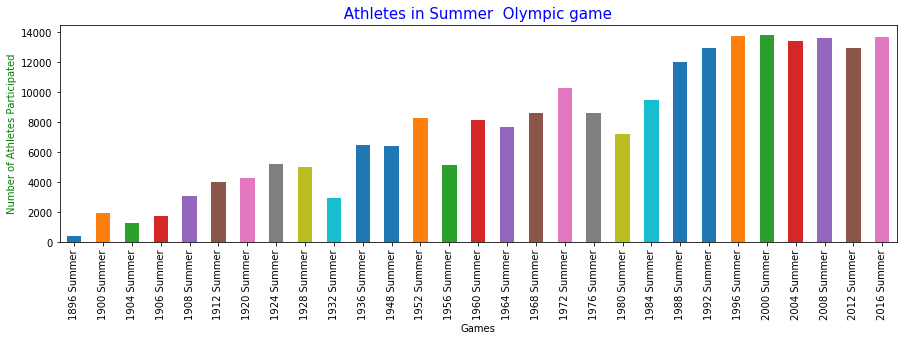

In [43]:
barplot_athlete(Summer_olympics,' Athletes in Summer  Olympic game ')

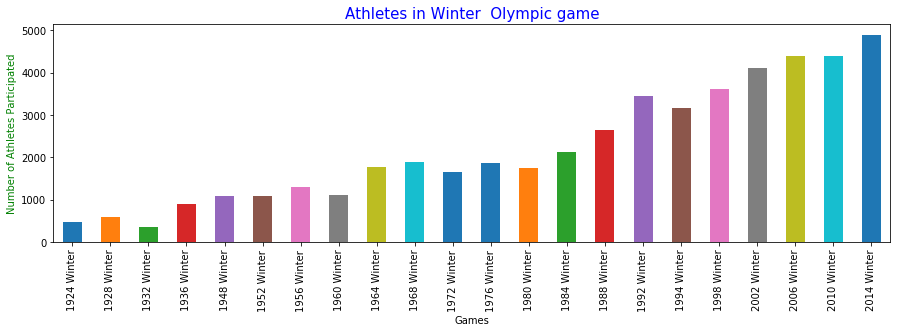

In [44]:
# for winters 
Winter=df[df.Season.notnull()]
Winter_olympics=Winter[Winter.Season=='Winter']
barplot_athlete(Winter_olympics,'Athletes in Winter  Olympic game')

In summer olympic number athelete participated from summer 2000-2016 remains constant 

# which country is the performer in all time in 120 years ?

In [52]:
def  medalplot_games(data,title):
     """ Function for plotting abar graph for the given dimension name on the dataset. 
        This function is used by some question they require same type of analysis to be done. 
        So, I have reused the code by defining function for data preprocessing as well as ploting at one one go.
    
    INPUT - 
    data : for which game we are going to plot summer or winter 
    title : Name of title that we wanted to plot

    OUTPUT - bar chart showing the total count per dimension of games
    """
    # Top 3 Countries  in Olympics All time
    plt.title(title,size=18, color="Purple")
    plt.subplot(3,1,1)
    Gold_Medal  = data[data.Medal ==  "Gold"].Team.value_counts().head(3)
    Gold_Medal.plot(kind='bar',rot=0,figsize=(15, 10))
    plt.ylabel("Gold Medals")
    plt.subplot(3,1,2)
    silver_medal = data[data.Medal == "Silver"].Team.value_counts().head(3)
    silver_medal.plot(kind='bar',rot=0,figsize=(15, 10))
    plt.ylabel("Silver Medals")
    plt.subplot(3,1,3)
    bronze_medal = data[data.Medal == "Bronze"].Team.value_counts().head(3)
    bronze_medal.plot(kind='bar',rot=0,figsize=(15, 10))
    plt.ylabel("Bronze Medals")
    plt.savefig('medal.jpg')

IndentationError: unindent does not match any outer indentation level (<ipython-input-52-22339fef59d9>, line 13)

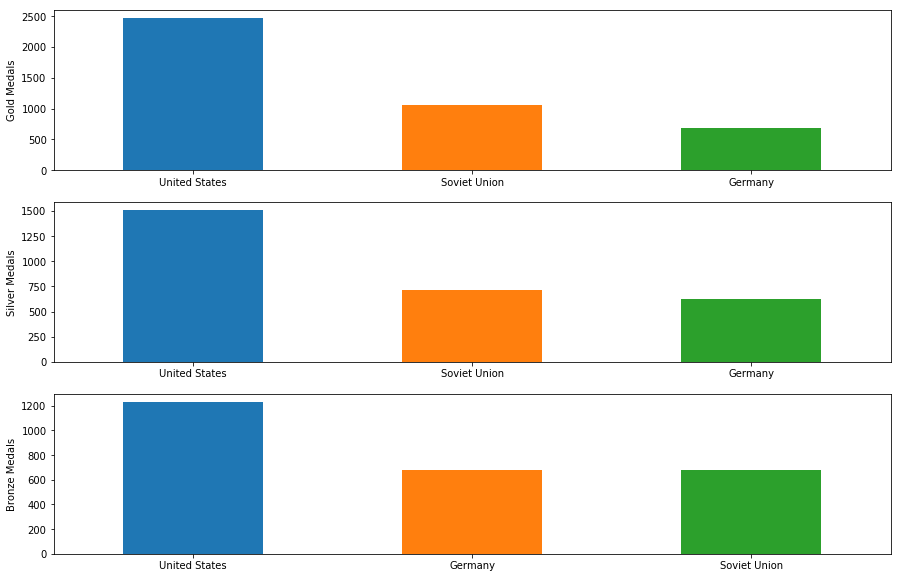

In [53]:
## Top 3 Countries  in Olympics All time
medalplot_games(df,'Best Performer in all Olympics')

clearly USA Leaves everyone behind 

Lets do sepaerately for Summer and Winter olympics

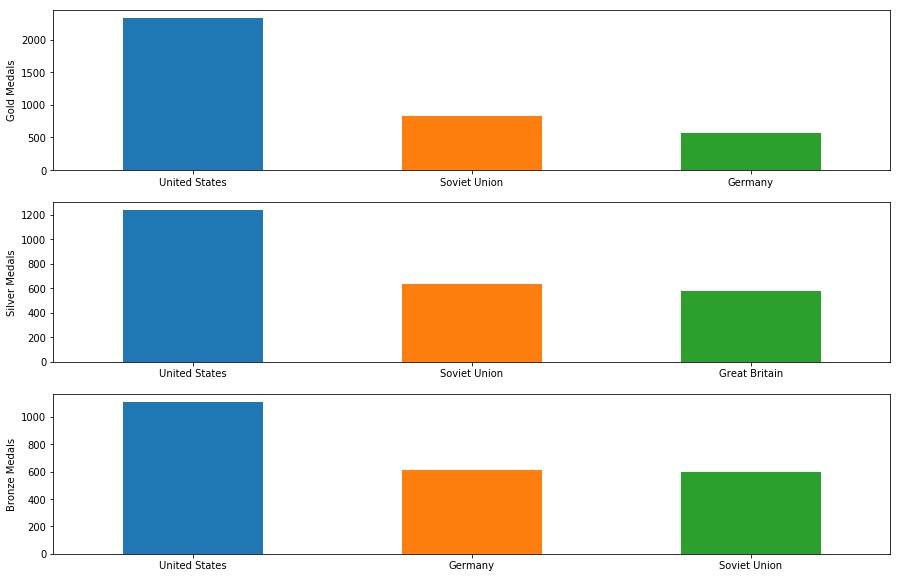

In [54]:
medalplot_games(Summer_olympics,'Best Performer in Summer Olympics')

USA IS CHAMPION IN SUMMER OLYMPICS 

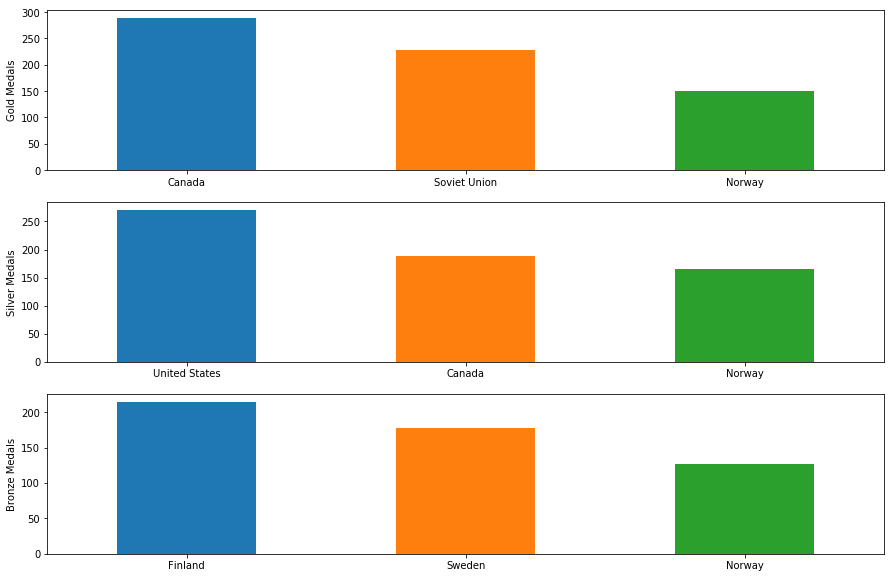

In [55]:
medalplot_games(Winter_olympics,'Best Performer in Winter Olympics')

Clearly Canada won more gold medala in winter olympics

**USA PERFORMANCE IN SUMMER OLYMPICS**

Text(0.5,1,' Performance of USA  in Summer  Olympic game')

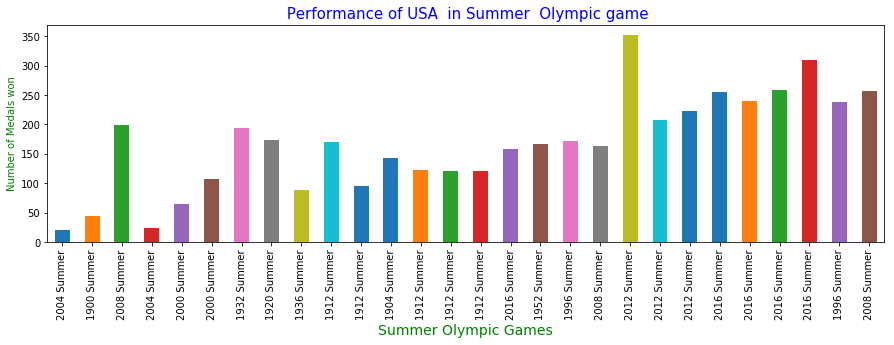

In [56]:
#Maximum medal won in which year
USA_Summer=Summer_olympics[Summer_olympics.Medal.notnull()]
USA_Summer_Olympics=USA_Summer[USA_Summer.Team=='United States']
USA_Summer_Olympics.head()
USASummer =USA_Summer_Olympics.groupby('Games').count()['Medal']
fig, ax = plt.subplots(figsize=(15,5))

D=USASummer.plot.bar(figsize=(15,4))
D.set_xticklabels(labels=USA_Summer_Olympics['Games'],rotation=90)

ax.set_xlabel('Summer Olympic Games', size=14, color="GREEN")
ax.set_ylabel('Number of Medals won', size=10, color="GREEN")
ax.set_title(' Performance of USA  in Summer  Olympic game', size=15, color="BLUE")

                              For USA summer 2012 was best olympic games in 120 years

Text(0.5,1,' Performance of USA  in Winter Olympic game')

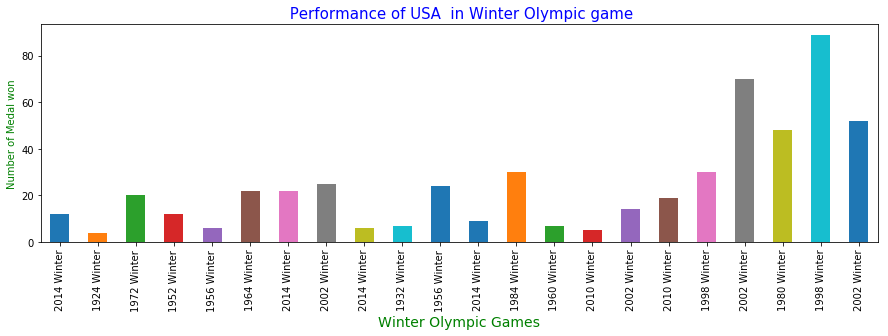

In [57]:
# USA IN winter olympics
USA_Winter=Winter_olympics[Winter_olympics.Medal.notnull()]
USA_Winter_Olympics=USA_Winter[USA_Winter.Team=='United States']
USA_Winter_Olympics.head()
USAWinter =USA_Winter_Olympics.groupby('Games').count()['Medal']
fig, ax = plt.subplots(figsize=(15,5))

E=USAWinter.plot.bar(figsize=(15,4))
E.set_xticklabels(labels=USA_Winter_Olympics['Games'],rotation=90)

ax.set_xlabel('Winter Olympic Games', size=14, color="GREEN")
ax.set_ylabel('Number of Medal won', size=10, color="GREEN")
ax.set_title(' Performance of USA  in Winter Olympic game', size=15, color="BLUE")

                     Clearly USA had best 1998 winter olympics 

**Medals won By USA in Summer  Olympics**

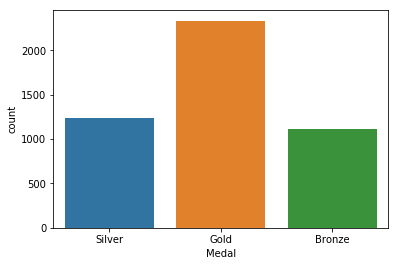

In [58]:
USA_Summer_Olympics.head()
sns.countplot(x='Medal',data=USA_Summer_Olympics)

In [59]:
USA_Summer2=Summer_olympics[Summer_olympics.Team.notnull()]
USA_Summer_ololympics2=USA_Summer2[USA_Summer2.Team=='United States']
print('The youngest age athlete  of  USA in Summer Olympics is:' ,USA_Summer_ololympics2.Age.min())
print('The average age of athletes of USA in Summer Olympics is:',USA_Summer_ololympics2.Age.mean())
print('The oldest  Age of athlete of USA in Summer Olympics is:',USA_Summer_ololympics2.Age.max())


The youngest age athlete  of  USA in Summer Olympics is: 12.0
The average age of athletes of USA in Summer Olympics is: 26.226537896283855
The oldest  Age of athlete of USA in Summer Olympics is: 97.0


# Can you find the average age of USA athelete which had won a medal ?

AVG AGE OF ATHELETE WON MEDAL FOR USA IN SUMMER OLYMPICS

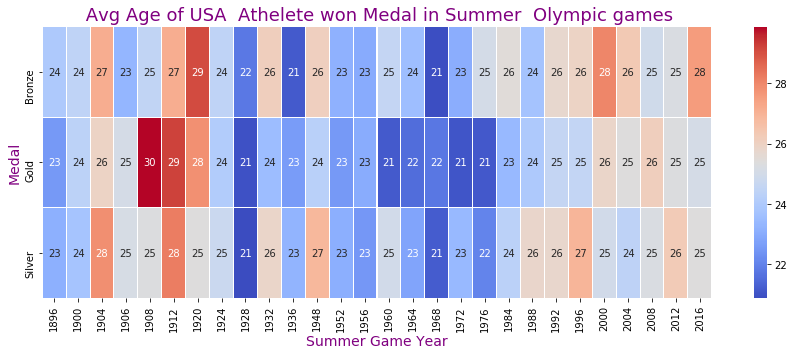

In [60]:
Bsl=USA_Summer_Olympics.pivot_table(values='Age',index='Medal',columns='Year')
f, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(Bsl,annot=True, linewidths=0.05,cmap="coolwarm")
ax.set_xlabel('Summer Game Year', size=14, color="Purple")
ax.set_ylabel('Medal', size=14, color="purple")
ax.set_title(' Avg Age of USA  Athelete won Medal in Summer  Olympic games', size=18, color="Purple")
plt.savefig('summer.jpg')

Clearly Average age was 25 when USA won any medal in Summer olympics

ATHLETES PARTICIPATION IN WINTER OLYMPICS 

In [61]:
print('The youngest Age of athlete  of In winter Olympic  is:' ,Winter_olympics.Age.min())
print('The average age of athletes of Winter  Olympic id:',Winter_olympics.Age.mean())
print('The Age of  oldest athlete of Winter Olypic is',Winter_olympics.Age.max())

The youngest Age of athlete  of In winter Olympic  is: 11.0
The average age of athletes of Winter  Olympic id: 25.0391474554154
The Age of  oldest athlete of Winter Olypic is 58.0


**Medal Distrubution of USA IN WINTER OLYPMPICS**

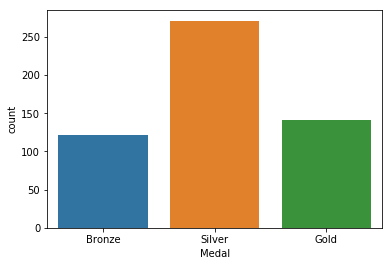

In [62]:
USA_Winter_Olympics.head()
sns.countplot(x='Medal',data=USA_Winter_Olympics)

In [63]:
#lets find out age of athelete for USA
USA_Winter2=Winter_olympics[Winter_olympics.Team.notnull()]
USA_Winter_Olympics2=USA_Winter2[USA_Winter2.Team=='United States']
print('The youngest age of athlete  of  USA in Winter Olympics is:' ,USA_Winter_Olympics2.Age.min())
print('The average age of athletes of USA Winter Olympics is:',USA_Winter_Olympics2.Age.mean())
print('The oldest Age of athlete of USA Winter Olympics is :',USA_Winter_Olympics2.Age.max())

The youngest age of athlete  of  USA in Winter Olympics is: 14.0
The average age of athletes of USA Winter Olympics is: 24.67871123155676
The oldest Age of athlete of USA Winter Olympics is : 51.0


 Avg Age of USA  Athelete won Medal in Winter  Olympic games

In [64]:
asl=USA_Winter_Olympics.pivot_table(values='Age',index='Medal',columns='Year')

Text(0.5,1,' Avg Age of USA  Athelete won Medal in Winter  Olympic games')

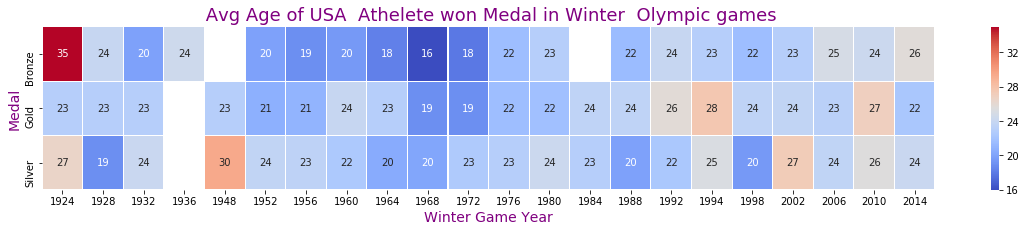

In [65]:
f, ax = plt.subplots(figsize=(20, 3))
sns.heatmap(asl,annot=True, linewidths=0.05,cmap="coolwarm")
ax.set_xlabel('Winter Game Year', size=14, color="Purple")
ax.set_ylabel('Medal', size=14, color="purple")
ax.set_title(' Avg Age of USA  Athelete won Medal in Winter  Olympic games', size=18, color="Purple")

So in winter game age of an athelete which had won medal is between 22-25.So thats mean more young blood is needed for USA to win a medal in winters olympic